<a href="https://colab.research.google.com/github/PabloPolMartin/MachineLearning/blob/main/Datasetmexico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Our essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Load dataset
df = pd.read_csv('Indicadores.csv', index_col=0, sep=',', encoding='latin-1')

In [ ]:
#Print dataset
df

,nom_ent,mun,clave_mun,nom_mun,pobtot_ajustada,pobreza,pobreza_e,pobreza_m,vul_car,vul_ing,...,pobreza_alim_10,pobreza_cap_90,pobreza_cap_00,pobreza_cap_10,pobreza_patrim_90,pobreza_patrim_00,pobreza_patrim_10,gini_90,gini_00,gini_10
ent,,,,,,,,,,,,,,,,,,,,,
1,Aguascalientes,1,1001,Aguascalientes,794304,30.531104,2.264478,28.266627,27.983320,8.419106,...,11.805700,20.4,12.7,18.474600,43.4,33.7,41.900398,0.473,0.425,0.422628
1,Aguascalientes,2,1002,Asientos,48592,67.111172,8.040704,59.070468,22.439389,5.557604,...,21.993299,39.9,29.0,30.980801,64.2,48.9,59.175800,0.379,0.533,0.343879
1,Aguascalientes,3,1003,Calvillo,53104,61.360527,7.241238,54.119289,29.428583,2.921336,...,19.266800,39.5,33.1,28.259199,63.9,57.9,56.504902,0.414,0.465,0.386781
1,Aguascalientes,4,1004,Cosío,14101,52.800458,4.769001,48.031458,27.128568,7.709276,...,14.303200,35.2,21.0,22.386101,59.7,40.1,51.164501,0.392,0.541,0.344984
1,Aguascalientes,5,1005,Jesús María,101379,45.338512,6.084037,39.254475,26.262912,8.279864,...,15.085100,36.6,22.6,22.139999,60.6,42.2,45.703899,0.391,0.469,0.458083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,Zacatecas,54,32054,Villa Hidalgo,21016,74.848837,12.301183,62.547654,19.229856,3.177689,...,30.055300,51.8,54.8,41.368999,73.5,70.9,70.859596,0.403,0.589,0.342037
32,Zacatecas,55,32055,Villanueva,27385,65.450191,10.203506,55.246687,23.623556,5.007426,...,13.138800,34.2,25.9,20.563601,57.8,44.1,46.659199,0.422,0.463,0.362527
32,Zacatecas,56,32056,Zacatecas,117528,29.541959,3.535624,26.006335,16.644262,8.828019,...,7.164800,15.7,20.7,12.115300,36.6,41.8,32.302700,0.528,0.498,0.436339


pobreza_alim_10
Alimento


In [ ]:
missing_data_per_column = df.isnull().sum()
print('Missing data per column:')
print(missing_data_per_column)
total_missing = df.isnull().sum().sum()
print('\nTotal missing data:', total_missing)
#Total
total_missing = df.isnull().sum().sum()
print('\nTotal null data:', total_missing)

Missing data per column:
nom_ent              0
mun                  0
clave_mun            0
nom_mun              0
pobtot_ajustada      0
                    ..
pobreza_patrim_00    3
pobreza_patrim_10    0
gini_90              2
gini_00              3
gini_10              0
Length: 138, dtype: int64

Total missing data: 305

Total null data: 305


In [ ]:
#Missing data per column
missing_data_per_column = df.isnull().sum()
#Number of columns with missing data
columns_with_missing_data = missing_data_per_column[missing_data_per_column > 0].count()
print('Number of columns with missing data:', columns_with_missing_data)

Number of columns with missing data: 56


In [ ]:
#Group data into subsets
grouped_subsets = {group: group_df for group, group_df in df.groupby('nom_ent')}

#Mean for numeric columns within each group
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = df.groupby('nom_ent')[numeric_columns].transform(lambda x: x.fillna(x.mean()))

In [ ]:
missing_data_per_column = df.isnull().sum()
#Missing data in total
total_missing = df.isnull().sum().sum()
print('\nTotal missing data in dataset:', total_missing)


Total missing data in dataset: 16


<ipython-input-8-dbd68952f990>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()[[feature_deseado]]


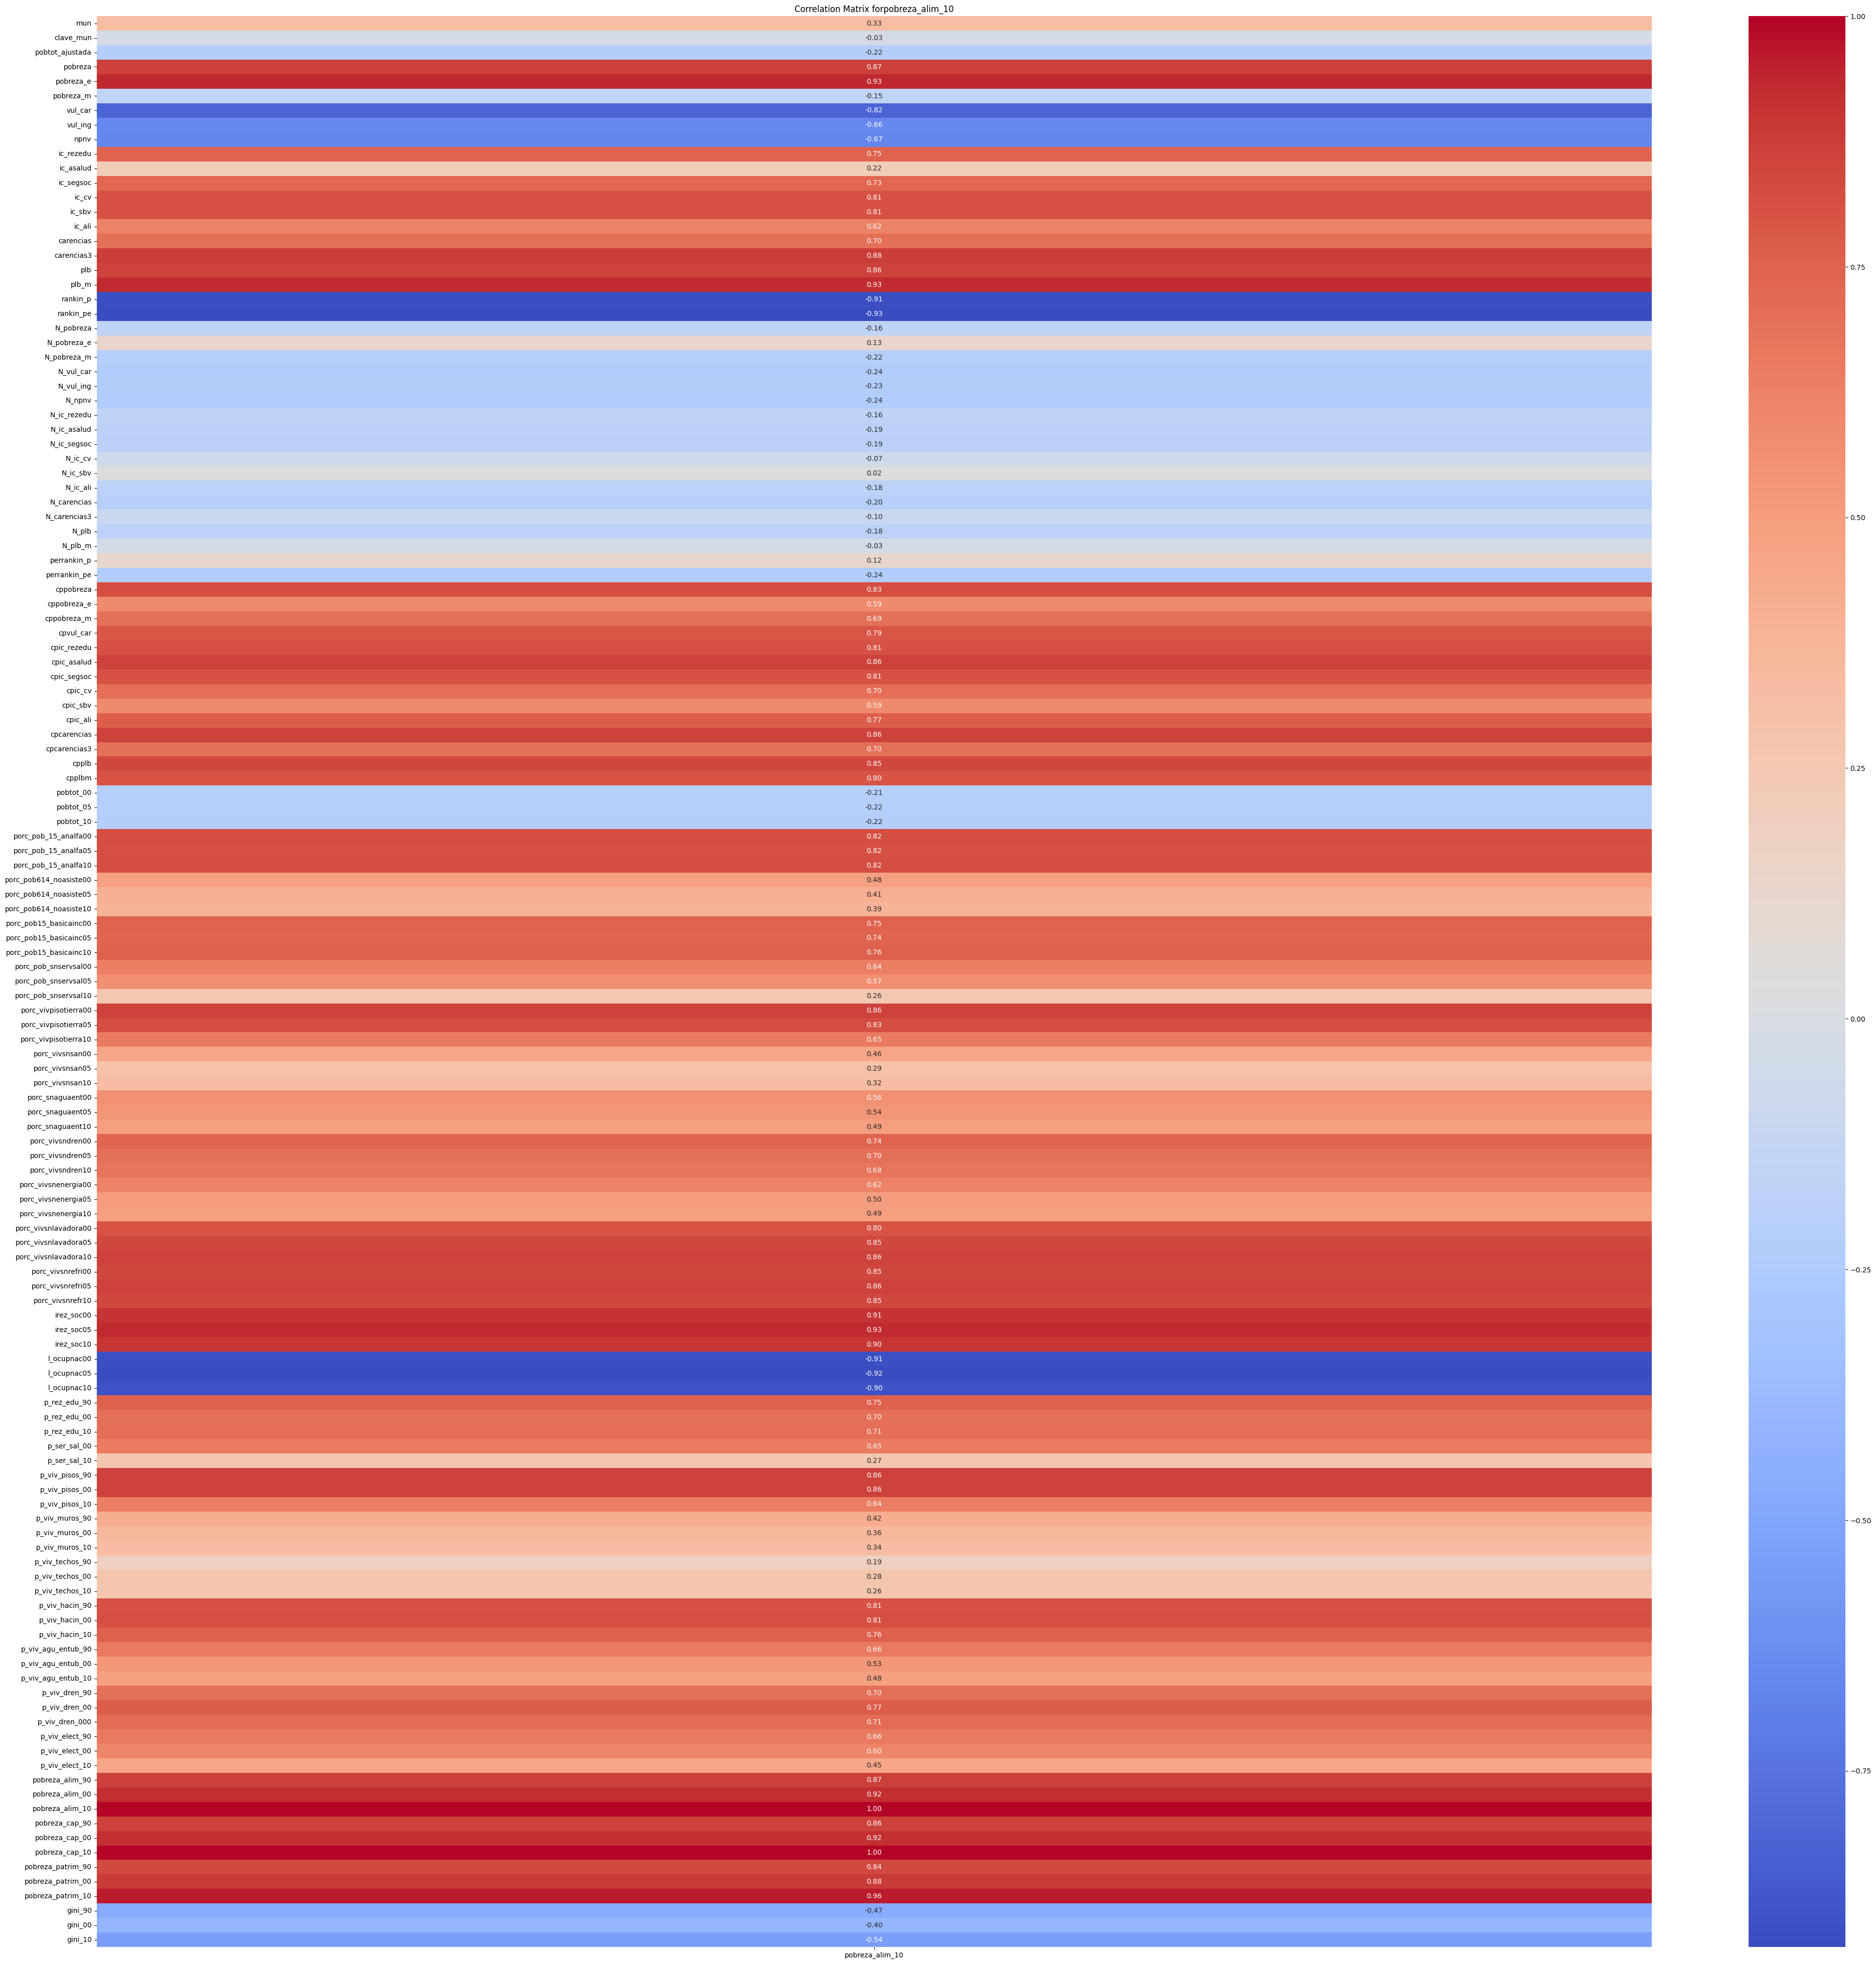

In [ ]:
#Select desired feature
feature_deseado = 'pobreza_alim_10'
#Correlation matrix between desired feature & other features
correlation_matrix = df.corr()[[feature_deseado]]
#Visualize matrix using heatmap
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix for' + feature_deseado)
plt.show()

In [ ]:
#outliers
#Identification and elimination of outliers
numeric_columns = df.select_dtypes(include=np.number).columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = (df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))
df = df[~outliers.any(axis=1)]
# Identifying outliers
outliers = (df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))
# Deleting outliers
df = df[~outliers.any(axis=1)]
#New shape of the DataFrame
print('DataFrame after removing outliers:', df.shape)

DataFrame after removing outliers: (762, 138)


In [ ]:
#Target variable
target_variable = 'pobreza_alim_10'
features = ['pobreza', 'pobreza_e', 'ic_rezedu', 'ic_segsoc', 'ic_cv', 'ic_sbv', 'carencias', 'carencias3', 'plb', 'plb_m', 'cppobreza', 'cpvul_car','cpic_rezedu','cpic_asalud', 'cpic_segsoc','cpic_ali','cpcarencias','cpcarencias3','cpplb','cpplbm','pobtot_10', 'porc_pob_15_analfa00', 'porc_pob_15_analfa05', 'porc_pob_15_analfa10', 'porc_pob15_basicainc00', 'porc_pob15_basicainc05', 'porc_pob15_basicainc10', 'porc_vivsndren00', 'porc_vivsndren05', 'porc_vivsnlavadora00', 'porc_vivsnlavadora05', 'porc_vivsnlavadora10', 'irez_soc00', 'irez_soc05', 'irez_soc10', 'p_rez_edu_90','p_rez_edu_00', 'p_rez_edu_00', 'p_viv_pisos_90', 'p_viv_pisos_00', 'p_viv_pisos_10', 'p_viv_hacin_90', 'p_viv_hacin_00', 'p_viv_hacin_10', 'p_viv_dren_90', 'p_viv_dren_00', 'p_viv_dren_000', 'pobreza_alim_90', 'pobreza_alim_00', 'pobreza_alim_10', 'pobreza_cap_90', 'pobreza_cap_00', 'pobreza_cap_10', 'pobreza_patrim_90', 'pobreza_patrim_00', 'pobreza_patrim_10']
#Create feature data set (X) and target variable (y)
X = df[features].values
y = df[target_variable].values
#Split for training and test (80% train, 20% test)
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
#Train linear regression model
X_train_transposed = X_train.T
X_train_transposed_with_bias = np.vstack([X_train_transposed, np.ones(len(X_train))]).T
coefficients = np.linalg.inv(X_train_transposed_with_bias.T.dot(X_train_transposed_with_bias)).dot(X_train_transposed_with_bias.T).dot(y_train)
#Predictions in test set
X_test_with_bias = np.vstack([X_test.T, np.ones(len(X_test))]).T
y_pred = X_test_with_bias.dot(coefficients)
#Calc Mean Squared Error (MSE)
mse = np.mean((y_test - y_pred) ** 2)
#Calc determination coefficient (R^2)
y_mean = np.mean(y_test)
sst = np.sum((y_test - y_mean) ** 2)
ssr = np.sum((y_test - y_pred) ** 2)
r2 = 1 - (ssr / sst)

print('Mean Squared Error (MSE):', mse)
print('Determination coefficient (R^2):', r2)

Mean Squared Error (MSE): 116268881.18215369
Determination coefficient (R^2): -1538780.628442457


In [ ]:
#Predictions
for i in range(len(y_test)):
    print(f'Real Value: {y_test[i]}, Prediction: {y_pred[i]}')

Real Value: 25.37240028, Prediction: -7671.91314064085
Real Value: 32.0646019, Prediction: -8272.803320697401
Real Value: 24.4552002, Prediction: -19551.003850474193
Real Value: 18.87700081, Prediction: -5013.236327951814
Real Value: 18.00690079, Prediction: -4411.494238593886
Real Value: 34.79570007, Prediction: -19470.163964043655
Real Value: 26.0442009, Prediction: -6885.434872159557
Real Value: 12.46370029, Prediction: -2395.4186669778005
Real Value: 13.27429962, Prediction: -12363.973577606743
Real Value: 16.41740036, Prediction: -10787.581203282043
Real Value: 13.79629993, Prediction: -11136.142456888261
Real Value: 14.27770042, Prediction: -8348.594353248509
Real Value: 10.91880035, Prediction: -2645.610289135491
Real Value: 18.34180069, Prediction: -8583.59800705359
Real Value: 11.9375, Prediction: -5594.753945530588
Real Value: 9.851699829, Prediction: -1745.2572293533274
Real Value: 32.47359848, Prediction: -10542.359827004731
Real Value: 11.92450047, Prediction: -11822.79778

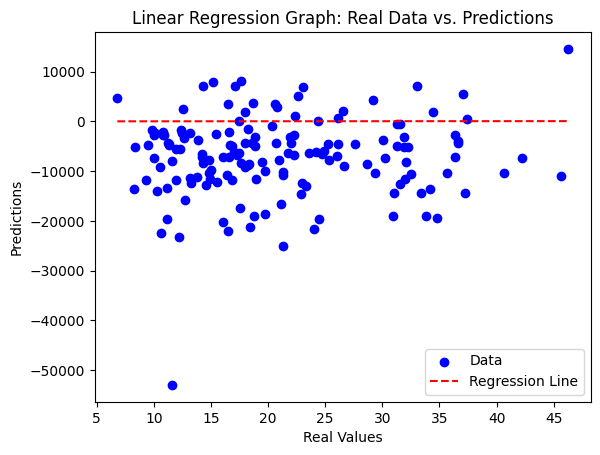

In [ ]:
#Graphic Lineal Regression
plt.scatter(y_test, y_pred, color='blue', label='Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Regression Line')
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Linear Regression Graph: Real Data vs Predictions')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Select the relevant features and target variable
features = ['pobreza', 'pobreza_e', 'ic_rezedu', 'ic_segsoc', 'ic_cv', 'ic_sbv', 'carencias', 'carencias3', 'plb', 'plb_m', 'cppobreza', 'cpvul_car','cpic_rezedu','cpic_asalud', 'cpic_segsoc','cpic_ali','cpcarencias','cpcarencias3','cpplb','cpplbm','pobtot_10', 'porc_pob_15_analfa00', 'porc_pob_15_analfa05', 'porc_pob_15_analfa10', 'porc_pob15_basicainc00', 'porc_pob15_basicainc05', 'porc_pob15_basicainc10', 'porc_vivsndren00', 'porc_vivsndren05', 'porc_vivsnlavadora00', 'porc_vivsnlavadora05', 'porc_vivsnlavadora10', 'irez_soc00', 'irez_soc05', 'irez_soc10', 'p_rez_edu_90','p_rez_edu_00', 'p_rez_edu_00', 'p_viv_pisos_90', 'p_viv_pisos_00', 'p_viv_pisos_10', 'p_viv_hacin_90', 'p_viv_hacin_00', 'p_viv_hacin_10', 'p_viv_dren_90', 'p_viv_dren_00', 'p_viv_dren_000', 'pobreza_alim_90', 'pobreza_alim_00', 'pobreza_alim_10', 'pobreza_cap_90', 'pobreza_cap_00', 'pobreza_cap_10', 'pobreza_patrim_90', 'pobreza_patrim_00', 'pobreza_patrim_10']
target_variable = 'pobreza_alim_10'
# Create the feature dataset (X) and the target variable (y)
X = df[features].values
y = df[target_variable].values
#Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
#Predictions on the test set
y_pred = model.predict(X_test)
#Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('Determination coefficient:', r2)

Mean Squared Error (MSE): 2.911690113919168e-24
Determination coefficient: 1.0


In [ ]:
#Predictions
for i in range(len(y_test)):
    print(f'Valor Real: {y_test[i]}, Predicción: {y_pred[i]}')

Valor Real: 14.19939995, Predicción: 14.199399950001725
Valor Real: 21.62210083, Predicción: 21.62210083000142
Valor Real: 45.082901, Predicción: 45.08290099999726
Valor Real: 23.93190002, Predicción: 23.931900020001784
Valor Real: 20.81949997, Predicción: 20.819499970000393
Valor Real: 21.61669922, Predicción: 21.616699220002165
Valor Real: 31.50790024, Predicción: 31.507900239997085
Valor Real: 22.91570091, Predicción: 22.915700910000243
Valor Real: 9.851699829, Predicción: 9.851699829000413
Valor Real: 42.48519897, Predicción: 42.48519896999972
Valor Real: 13.35599995, Predicción: 13.3559999499975
Valor Real: 33.54320145, Predicción: 33.54320145000206
Valor Real: 20.03210068, Predicción: 20.032100679995274
Valor Real: 24.80150032, Predicción: 24.801500319998674
Valor Real: 16.68779945, Predicción: 16.687799450001325
Valor Real: 7.072800159, Predicción: 7.072800158999694
Valor Real: 31.45910072, Predicción: 31.45910072000161
Valor Real: 27.51189995, Predicción: 27.51189995000007
Valo

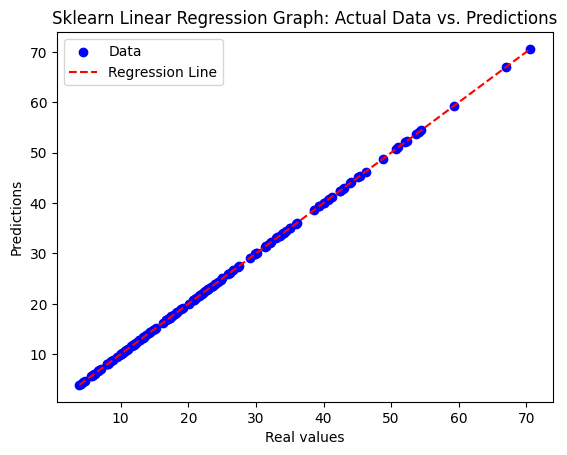

In [ ]:
#Graphic Sklearn
plt.scatter(y_test, y_pred, color='blue', label='Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Regression Line')
plt.xlabel('Real values')
plt.ylabel('Predictions')
plt.title('Linear Regression Graph: Real Data vs Predictions')
plt.legend()
plt.show()

In [ ]:
#Generate sample data
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2, 4, 5, 4, 5])
#Define linear regression function
def simple_linear_regression(X, Y):
    n = len(X)
    sum_x = np.sum(X)
    sum_y = np.sum(Y)
    xy = np.dot(X, Y)
    xx = np.dot(X, X)
    #Calc the coefficientS
    slope = (n * xy - sum_x * sum_y) / (n * xx - sum_x * sum_x)
    intercept = (sum_y - slope * sum_x) / n
    return slope, intercept
# Train the model
slope, intercept = simple_linear_regression(X, Y)
# Make predictions
def predict(slope, intercept, x):
    return slope * x + intercept
#Test the model
x_test = 6
y_pred = predict(slope, intercept, x_test)
print(f"Prediction for x={x_test}: {y_pred}")

Prediction for x=6: 5.8


In [ ]:
!jupyter nbconvert --to html Predict.ipynb

[NbConvertApp] Converting notebook Predict.ipynb to html
[NbConvertApp] Writing 1339270 bytes to Predict.html
